In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import numpy as np
import datetime as dt
import pandas_datareader as web
import os
import pickle
import sklearn
from sklearn import svm, neighbors, preprocessing
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
import math
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
### getting the tickers list of BSE companies from wikipedia through scrapping  

source_code = requests.get('https://en.wikipedia.org/wiki/List_of_BSE_SENSEX_companies')
web_soup = bs(source_code.text,'lxml')
stcks = web_soup.select('table#constituents tbody tr')[1:]
stcks
ss1 = [stck.select('td')[2:3] for stck in stcks if stck.find('td') != None] 
tick_text = []
tickers = []
for i in range(len(ss1)):
    tick_text.append(ss1[i][0].string.strip())
tick_text 
ss2 = [stck.select('td')[1] for stck in stcks if stck.find('td') != None]
for i in range(len(ss2)):
    tickers.append(ss2[i].string.strip())
tickers 

In [9]:
startdate = '2018-01-01'
end = dt.date(2021,3,4)

### function that will fetch financial of a company data from yahoo

def myportfolio(stocks):
    data = web.DataReader(stocks, data_source = 'yahoo', start = startdate, end = end)
    return data

### storing data as csv file in memory

def file_save(tick_text):
    if not os.path.exists('M:/BSE_df'):
        os.makedirs('M:/BSE_df')
    for stoc in tick_text:
        if not os.path.exists(f'M:/BSE_df/{stoc}.csv'):
            with open(f'M:/BSE_df/{stoc}.csv','wb') as file:
                writer = pickle.dump(myportfolio(stoc),file)
        else:
            print('it is there')
file_save(tick_text)   


In [102]:
### using asian paints company's data for analysis

with open('M:/BSE_df/ASIANPAINT.BO.csv','rb') as file:
    df_AP = pickle.load(file)
df_AP.head() 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771


### Figuring out the best method to predict the stock prices

In [66]:
### Training and testing methods on a part of dataset 

df_AP['pred'] = df_AP['Adj Close'].shift(-1)
X = df_AP.drop(['pred','Volume'],1).values
X = X[:722]
X_lately = df_AP.drop(['pred','Volume'],1).values[722:]
y = df_AP['pred'].values
y = y[:722]

In [73]:
### using voting classifier to vote out the best method among the given

predi = []
accuracy = []
for i in range(60):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
    clf = VotingClassifier([('svc',svm.SVC()),('rf',RandomForestClassifier()),('KNN',neighbors.KNeighborsClassifier())])
    clf.fit(X_train.astype(int), y_train.astype(int))
    accuracy.append(clf.score(X_test.astype(int),y_test.astype(int)))
    predi.append(clf.predict(X_lately))
    
print('coefficient of determination : ',np.array(accuracy).sum()/60)
a = 0
for i in range(len(predi)):
    a = a + predi[i]
b = a/len(predi)
print('\n predicted values for 1 day into future for 60 days : ',b)

coefficient of determination :  0.005977011494252875

 predicted values for 1 day into future for 60 days :  [2428.76666667 2427.9        2418.76666667 2423.33333333 2418.76666667
 2418.76666667 2418.76666667 2408.13333333 2418.76666667 2418.76666667
 2408.13333333 2408.13333333 2413.45       2395.85       2387.55
 2411.46666667 2421.03333333 2415.33333333 2421.03333333 2427.15
 2427.15       2432.46666667 2432.46666667 2427.15       2392.91666667
 2403.35       2417.56666667 2413.45       2408.13333333 2402.33333333
 2401.68333333 2400.71666667 2428.2        2438.5        2370.9
 2379.68333333 2370.9        2435.08333333 2438.5        2367.45
 2367.45       2367.45       2426.73333333 2418.76666667 2418.76666667
 2428.2        2422.88333333 2412.55       2367.45       2394.56666667
 2393.86666667 2367.45       2367.45       2367.45       2367.45
 2177.03333333 2366.2        2367.45       2367.45       2367.45      ]


In [93]:
### using linearregression 

predi = []
accuracy = []
for i in range(60):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
    clf = LinearRegression(normalize=True,fit_intercept=True,n_jobs=-1)
    clf.fit(X_train.astype(int), y_train.astype(int))
    accuracy.append(clf.score(X_test.astype(int),y_test.astype(int)))
    predi.append(clf.predict(X_lately))
    
print('coefficient of determination : ',np.array(accuracy).sum()/60)
a = 0
for i in range(len(predi)):
    a = a + predi[i]
b = a/len(predi)
print('\n predicted values for 1 day into future for 60 days : ',b)

coefficient of determination :  0.9901484799431971

 predicted values for 1 day into future for 60 days :  [2517.17794287 2529.78152877 2518.92480052 2548.79804263 2525.94326267
 2579.81264064 2576.01106122 2603.79952517 2556.39237437 2596.68100796
 2640.80417469 2645.41003802 2678.50340792 2695.86058404 2728.57574501
 2760.93951979 2773.35649271 2755.38482558 2787.84471787 2801.47045592
 2793.61543337 2837.05508301 2847.91896037 2741.3992574  2703.89431653
 2667.1648144  2593.57414485 2588.55640842 2643.35216548 2693.53709952
 2723.28567727 2606.30898811 2520.84185835 2442.55492202 2440.59354292
 2413.64783878 2440.41404226 2465.28850586 2456.27510172 2407.16660249
 2381.29403787 2417.51229058 2503.6610549  2510.15092827 2507.86891079
 2486.78291528 2462.84104853 2449.92461657 2394.35746172 2464.74455588
 2421.69068124 2393.37353588 2369.59897338 2353.94691796 2372.40635475
 2283.64029268 2361.10462714 2390.66438691 2401.87379689 2415.61541614]


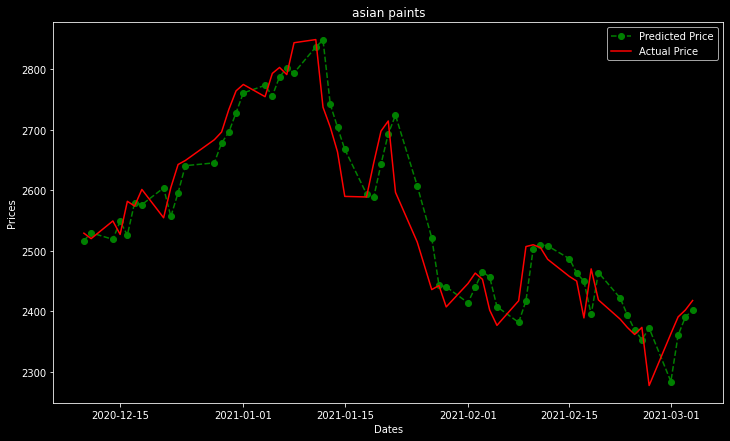

In [57]:
### visualizing the accuracy of linearregression

style.use('dark_background')
plt.figure(figsize=(12,7))
plt.plot(df_AP['Adj Close'][723:].index, b[:-1], color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(df_AP['Adj Close'][723:].index, df_AP['Adj Close'][723:], color='red', label='Actual Price')
plt.legend()
plt.title('asian paints')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [64]:
### predicting stock price 10 days into future with linearregression

dfs_new = df_AP
dfs_new['pred'] = dfs_new['Adj Close'].shift(-10)
# df_ADBE.dropna(inplace=True)
X = dfs_new.drop(['pred','Volume'],1).values
X_lately = X[-10:]
X = X[:-10]
y = dfs_new['pred'].values
y = y[:-10]

In [65]:
predi = []
accuracy = []
for i in range(50):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2)
    clf = LinearRegression(normalize=True,fit_intercept=True)
    clf.fit(X_train.astype(int), y_train.astype(int))
    accuracy.append(clf.score(X_test.astype(int),y_test.astype(int)))
    predi.append(clf.predict(X_lately))

aa = 0
for i in range(len(predi)):
    aa = aa + predi[i]
b = aa/len(predi)
print(np.array(accuracy).sum()/len(predi),b)


0.9485045928456046 [2390.04808662 2383.88177916 2349.36997039 2300.97165765 2373.44722352
 2262.12960021 2370.64439201 2395.88865082 2401.35609263 2409.10728589]


In [104]:
df_sen = myportfolio('^BSESN')['Adj Close']

In [106]:
df_AP.rename(columns={'Adj Close':'ASP_Adj_Close'},inplace=True)
df_AP = pd.concat([df_AP,df_sen],1)


In [107]:
df_AP.rename(columns={'Adj Close':'SEN_Adj_Close'},inplace=True)

In [108]:
df_AP['ASP_pct_change'] = df_AP['ASP_Adj_Close'].pct_change(1)


In [109]:
df_AP['SEN_pct_change'] = df_AP['SEN_Adj_Close'].pct_change(1)

In [110]:
df_AP.head()

,High,Low,Open,Close,Volume,ASP_Adj_Close,SEN_Adj_Close,ASP_pct_change,SEN_pct_change
Date,,,,,,,,,
2018-01-01,1165.550049,1140.000000,1160.0,1146.500000,21776.0,1122.931519,33812.750000,NaN,NaN
2018-01-02,1149.400024,1134.949951,1145.0,1142.849976,22009.0,1119.356445,33812.261719,-0.003184,-0.000014
2018-01-03,1150.000000,1136.000000,1150.0,1141.099976,636697.0,1117.642578,33793.378906,-0.001531,-0.000558
2018-01-04,1178.699951,1148.199951,1149.5,1172.050049,75615.0,1147.956421,33969.640625,0.027123,0.005216
2018-01-05,1191.000000,1168.550049,1172.0,1183.750000,58612.0,1159.415771,34153.851562,0.009982,0.005423


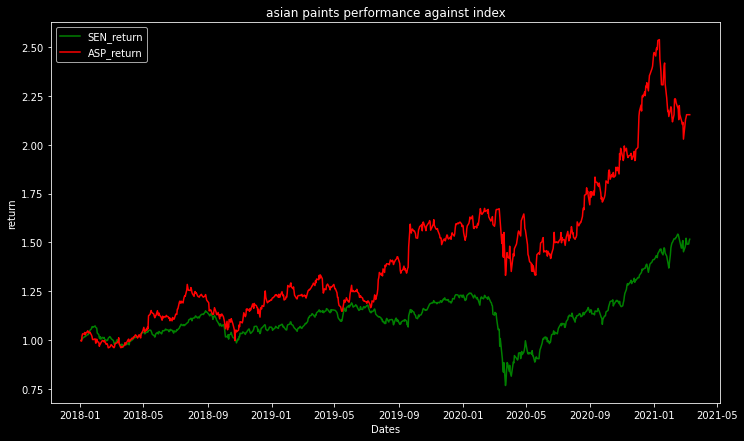

In [111]:
### visualizing the performance of asian paints with respect to market

style.use('dark_background')
plt.figure(figsize=(12,7))
plt.plot(df_AP.index, (df_AP['SEN_pct_change'] + 1).cumprod(), color='green', label='SEN_return')
plt.plot(df_AP.index, (df_AP['ASP_pct_change'] + 1).cumprod(), color='red', label='ASP_return')
plt.legend()
plt.title('asian paints performance against index')
plt.xlabel('Dates')
plt.ylabel('return')
plt.legend()